<font size=6><b>Drug-related questions classification, a challenge by POSOS</b></font>
<br><br><font size=4><b>By Ahmed Amine MAJDOUBI</b></font>


---
<br>
**Note:** This is a challenge made by the company POSOS in 2018. Here is the original ***[link](https://www.college-de-france.fr/site/stephane-mallat/Challenge-2017-2018-Reponses-a-des-questions-pharmaceutiques-par-Posos.htm)*** for the challenge. POSOS is an NLP start-up aiming at answering questions about medication from non-structured biomedical sources. The goal of Posos challenge is to predict for each question the associated intent.

# Challenge Context

More than 6,000 different drugs are commercialized in France. Not only patients but also healthcare professionals remain unable to use them correctly when they do not have immediate access to appropriate information they may seek. Medicines remain responsible for more than 144,000 hospitalizations every year in France while in the United States, 1.5 million people face drug misuse every year. Questions about drug prescription, dispensation or use should never remain unanswered. What is particularly interesting to understand about drug queries is what information people expect to get as an answer: for instance, associated side effects, ingredients or contra-indications. Millions of queries are asked every year about drugs. There is a limited number of query types but the same question could be asked in many ways. Therefore, understanding what information people expect to get when asking a question is a great challenge.


# Data description

  The input data ***input_train.csv*** is a list of questions written in French. Each line is constituted with a unique ID followed by one question. In the input file, the first line is the header. Columns are separated by , characters. They correspond to: ID: line number. It relates to the line number in the output file. question: the question whose intent has to be predicted. Here below is an example of the input file content:

  *   Est-ce qu'il existe une forme adaptée aux enfants de 5ans du Micropakine ?
  *   laroxyl à doses faibles pour le stress
  *   mon psy me dit de prendre 50mg de sertraline le matin et 50 mg de sertraline le soir. Peut-on prendre 100mg soit le matin ou à midi

The output file ***output_train.csv*** contains the intent associated to each ID. The first line is the header; columns are always separated by , characters. They correspond to the line number and the intent identification number:

A list of 50 different intents has been predefined. We anonymized them for this challenge converting intents to identification numbers.Intents are homogeneously distributed between training and test files.
From the input_test.csv file, competitors will provide an ***output_test.csv*** file with the same format as the ***output_train.csv*** file. They will predict for each line number, the associated intent number.





# Setting up the environment

In [0]:
# Importing libraries

print('--------Versions-------') # Load packages

import sys          # Access to system parameters
print("Python version: {}". format(sys.version))

import pandas as pd # Data processing and analysis
print("pandas version: {}". format(pd.__version__))

import matplotlib   # Scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np  # Scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp  # Scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import sklearn      # Machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import IPython
from IPython import display # Pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

# display all columns
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Model Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Model Helpers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# NLP libraries
import nltk
import re
import unidecode
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()

# Sentiment Analysis
nltk.download('punkt')
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

# Vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set_style('darkgrid')
from pandas.tools.plotting import scatter_matrix

# Configure Visualization Defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
'''
# Deep Learning
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten, Bidirectional, GlobalMaxPool1D, Convolution1D
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

'''

# Other libraries
import random 
import time  
from collections import Counter

# Check files in a directory
from subprocess import check_output

# Adjust this code to your own path
dataFolder = "../Datasets/NLP_POSOS"
print('\n--------Directory-------\n'+check_output(["ls", dataFolder]).decode("utf8"))

--------Versions-------
Python version: 3.7.0 (default, Jun 28 2018, 13:15:42) 
[GCC 7.2.0]
pandas version: 0.23.4
matplotlib version: 2.2.3
NumPy version: 1.15.1
SciPy version: 1.1.0
scikit-learn version: 0.19.2
IPython version: 6.5.0
[nltk_data] Downloading package punkt to /home/ennadir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!

--------Directory-------
CIS.txt
Dictionnary.txt
input_out.csv
input_test.csv
input_train.csv



In [0]:
# Reading train data
trainData = pd.read_csv('../Datasets/NLP_POSOS/input_train.csv',sep=';')
trainData['intention'] = pd.read_csv('../Datasets/NLP_POSOS/input_out.csv',sep=';').intention
trainData.drop(columns='ID',inplace=True)

# Reading test data
testData = pd.read_csv('../Datasets/NLP_POSOS/input_test.csv',sep=';')

print(trainData.info())
trainData.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 2 columns):
question     8028 non-null object
intention    8028 non-null int64
dtypes: int64(1), object(1)
memory usage: 125.5+ KB
None


,question,intention
0,"bonjour, je m suis trompé de forum pour ma question alors je la repose ici. je pris pour la première fois hier du paroxétine et ce matin c'est une catastrophe. picotement dasn tous le corps annonciateur de sueur froide très très massive et de vomissement. j'en suis à deux crises depuis 5 heure du mat. la cela semble passer mes mes mains reste moites et chaude estce normal pour la première fois merci a tous",28
1,est ce que le motilium me soulagera contre les nausées?,31
2,"mon médecin m'a prescrit adenyl. au 2ème cachet des maux de tête terribles et au 3ème palpitations, sueurs froides, chaleur intense dans la tête, tremblements, fourmillements dans la lèvre supérieure, difficultés à respirer.. dès l'arrêt du médicament tous les symptômes ont disparu. cela est-il déjà arrivé à quelqu'un??",28
3,Est-ce qu'il existe une forme adaptée aux enfant de 5ans du Micropakine ?,44
4,mon medecin me soigne pour une rhino pharingite et m'a prescrit du amoxicilline comme anti biotique. Est-ce vraiment pour cette indication?,31


# Adding Features

In [0]:
# Adding features
def digit_count (question):
    return sum(char.isdigit() for char in question)

def word_count (question):
    return len(question.split(' '))

def phrase_count (question):
    return len(question.split('.'))

trainData['digitCount'] = trainData['question'].apply(lambda x: digit_count(x))
trainData['wordCount'] = trainData['question'].apply(lambda x: word_count(x))
trainData['phraseCount'] = trainData['question'].apply(lambda x: phrase_count(x))

testData['digitCount'] = testData['question'].apply(lambda x: digit_count(x))
testData['wordCount'] = testData['question'].apply(lambda x: word_count(x))
testData['phraseCount'] = testData['question'].apply(lambda x: phrase_count(x))

# Understanding Data

Text(0.5,1,'Intention Distribution')

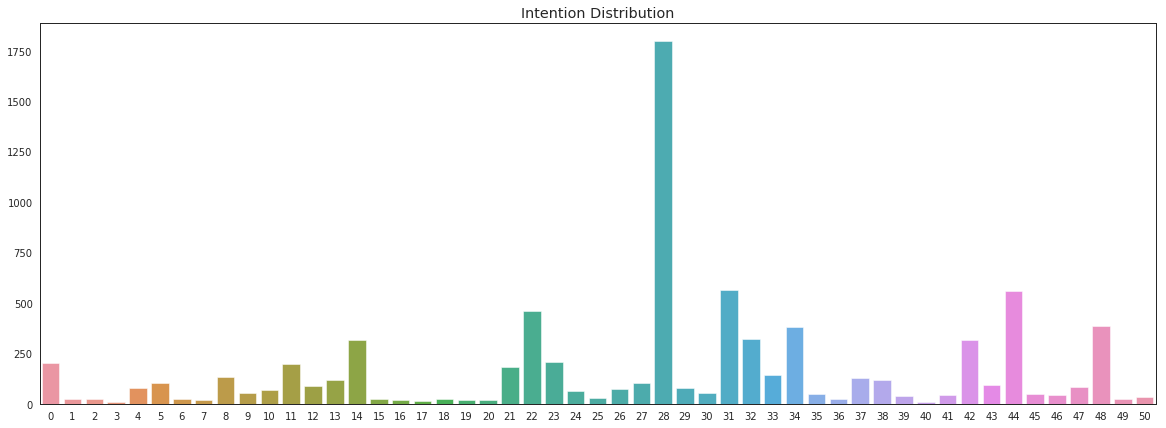

In [0]:
# Intention distribution
plt.subplots(figsize=(20,7))
s = trainData['intention'].value_counts()
sns.barplot(x=s.index, y=s.values)
plt.title('Intention Distribution')

In [0]:
trainData.groupby('intention')['digitCount'].describe().sort_values('count')['count']

intention
40    7.0   
3     8.0   
17    15.0  
16    17.0  
20    19.0  
7     20.0  
19    20.0  
2     22.0  
49    22.0  
1     23.0  
18    23.0  
15    23.0  
36    25.0  
6     26.0  
25    30.0  
50    33.0  
39    40.0  
46    45.0  
41    45.0  
45    50.0  
35    50.0  
30    52.0  
9     54.0  
24    64.0  
10    68.0  
26    72.0  
4     76.0  
29    77.0  
47    82.0  
12    89.0  
43    91.0  
5     102.0 
27    104.0 
13    119.0 
38    120.0 
37    126.0 
8     134.0 
33    144.0 
21    180.0 
11    195.0 
0     204.0 
23    208.0 
42    315.0 
14    317.0 
32    321.0 
34    382.0 
48    387.0 
22    461.0 
44    560.0 
31    565.0 
28    1796.0
Name: count, dtype: float64

The classes are clearly imbalanced

## Removing Outliers

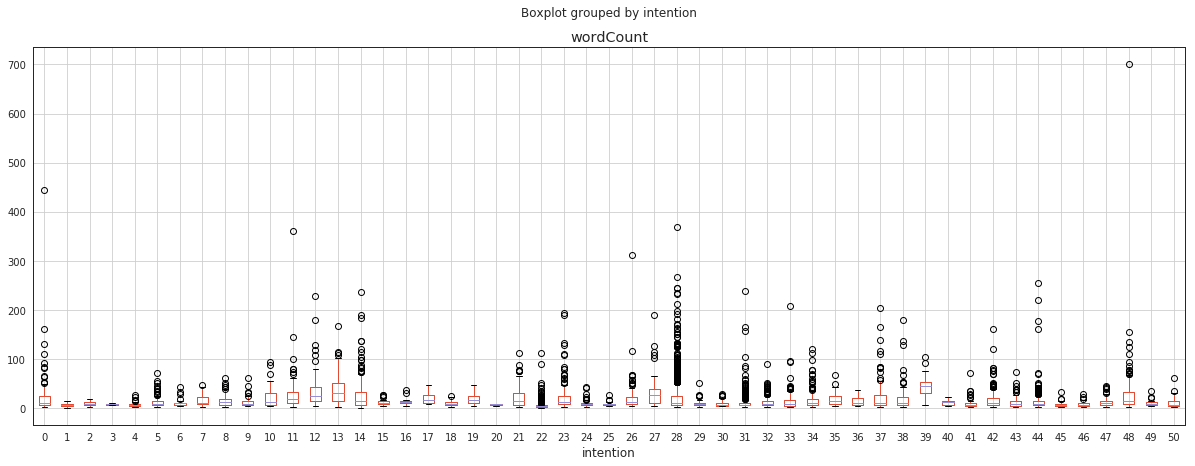

In [0]:
trainData.boxplot(column='wordCount',by='intention', figsize = (20,7))

In [0]:
trainData[trainData.wordCount > 400]

,question,intention,digitCount,wordCount,phraseCount
1363,"je prends effexor lp depuis des années, de 1 à 3 gélules à 37,5, selon mon état de juillet 08 à juillet 09 : 2 gélules à mg, que j'ai réduit à 1 (progressivement cet été). en octobre ça n'allait pas bien (hypersomnie, envie de rien, ..), j'ai vu un nouveau psy ds un cmp qui a - augmenté à 2 gélules (soit 150 mg) pdt 2semaines 1/2 - augmenté à 3 gélules (225 mg) pdt 3 semaines mon état = très différent mais pas mieux (insomnies, anxiété, agressivité, irritabilité, ..) donc le psy que j'ai revu a - baissé à 2 gélules (soit 150 mg) il y a 3 semaines j'en ai bien chié pdt ces 3 semaines, et là ça commence à peine à aller mieux. je l'ai revu aujourd'hui et il m'a changé d'ad (cymbalta 60mg 1 par jour) + imovane pour dormir, et 2 à 3 xanax 0,25 / jour sur le moment, je me suis dit pouruqoi pas.. mais vu mon état ""montagnes russes"" depuis que je vois ce psy, qui augmente/baisse d'une consultation sur l'autre (2 semaines 1/2 et 3 semaines ça me parait bref comme pallier pour juger de l'efficacité d'un dosage) j'ai peur de lui faire confiance à nouveau, vu que les fois précédentes et j'ai peur de changer d'ad.. - qu'est ce que ça vous inspire ? - pensez vous que cymbalta est un ""bon"" ad (à prendre à la suite d'effexor) ? - le dosage d'effexor de ces dernières semaines suffirait il à ""justifier"" mon moral yoyo (surtout les insomnies). j'ai pris effexor en 1995 à l'hosto (il n'était pas encore commercialisé) et j'avais des insomnies (toute la nuit) shootée au rohypnol + seresta pdt des mois (pour finir par faire une ts). - je suis diagnostiquée borderline - sous ad depuis pratiquement 10 ans (sans interruption même si à certaines époques je ne prenais ""que"" 37,5 d'effexor lp). j'ai pris prothiaden à une époque qui m'a bien aidée (il n'a pas voulu me le prescrire) - en psychothérapie analytique et ""bien"" avec mon psychothérapeute.. j'avoue que je suis trèès hésitante, mon psy-médocs ne m'inspire pas trop confiance, c'était très tendu cette consultation, la précédente (il y a 3 semaines) aussi. j'ai envie de lui faire confiance mais je crois que je n'y arrivepas, à cause de ce ""yoyo"" de dosage ces dernières semaines (je me suis sentie si mal que j'ai pensé à demander une hospitalisation pour me faire dormir !). merci par avance pour vos avis / expériences..",0,51,444,20
6820,"bonsoir, je suppose que ce sujet est récurrent, mais étant très angoissée (et très fatiguée), je ne peux m'empêcher de vous expliquer la situation sans faire toutes les pages du forum (ça fait déjà 20min que je tourne sur différents sites &amp; forums). alors voilà: j'ai 20 ans &amp; je prends la pilule leeloo gé depuis environ 1 an maintenant. je ne l'avais jamais oublié jusqu'ici. le seul problème rencontré est l'apparition de tâches brunes à 2 reprises (avec un cycle sans problème entre les 2) - plus importantes &amp; plus précoces la 2ème fois. ma gynécologue m'a confirmée que cela pouvait venir d'une carence en progestérone (étant donné que je ne suis pas très épaisse - la progestérone se stocke dans la graisse &amp; est responsable de la fixation de l'ovule dans l'utérus en cas de grossesse, la pilule a donc pour but de faire chuter son taux en fin de cycle, mais étant carencée ce taux a tendance à chuter plus tôt que prévu chez moi, et donc à me provoquer des pertes de sang pré-menstruation - et que j'ai quelques troubles alimentaires - et un passé pas très glorieux ""d'anorexique"" ). donc a priori, pas franchement de risque que je tombe enceinte, j'ai même peur de finir stérile d'ici à ce que je veuille des enfants. mais voilà, dimanche soir dernier, j'ai exceptionnellement dormi chez mon copain (on vit encore malheureusement chacun chez ses parents). cela tombait comme par hasard pile le jour où je devais commencer une nouvelle plaquette (ma semaine d'interruption se finissant le dimanche soir à 22h quand je reprends ma pilule). et moi qui suis une grande stressée, j'ai pris l'habitude de

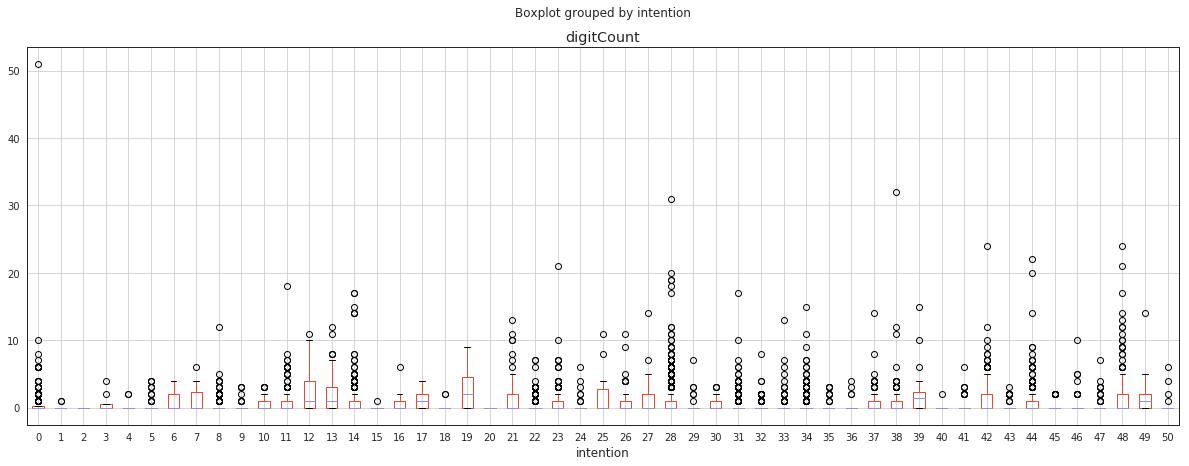

In [0]:
trainData.boxplot(column='digitCount',by='intention', figsize = (20,7))

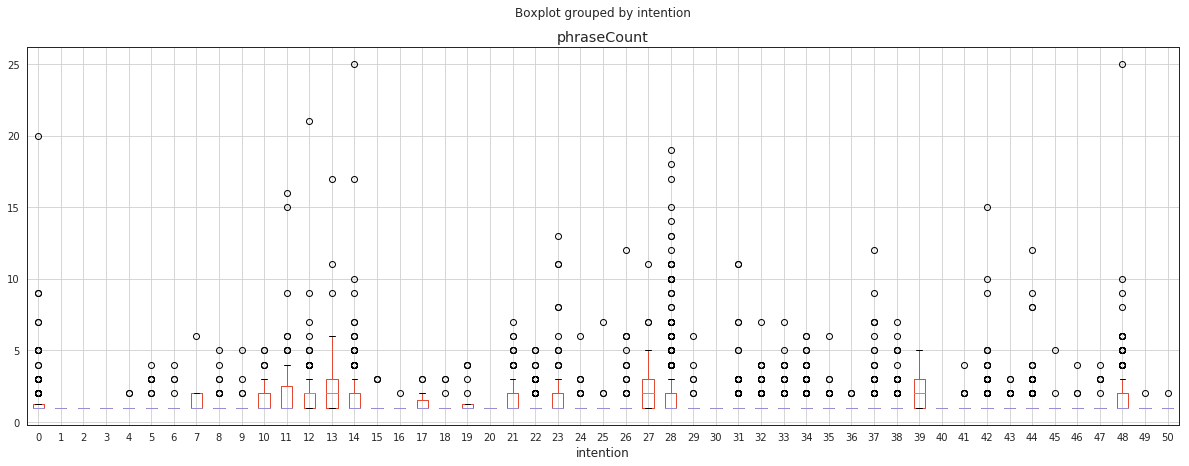

In [0]:
trainData.boxplot(column='phraseCount',by='intention', figsize = (20,7))

## Sentiment Analysis

In [0]:
def sentiment(x):
    text = x
    blob = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
    return blob.sentiment
trainData["polarity"] = trainData.question.apply(lambda x: sentiment(x)[0])
trainData["subjectivity"] = trainData.question.apply(lambda x: sentiment(x)[1])

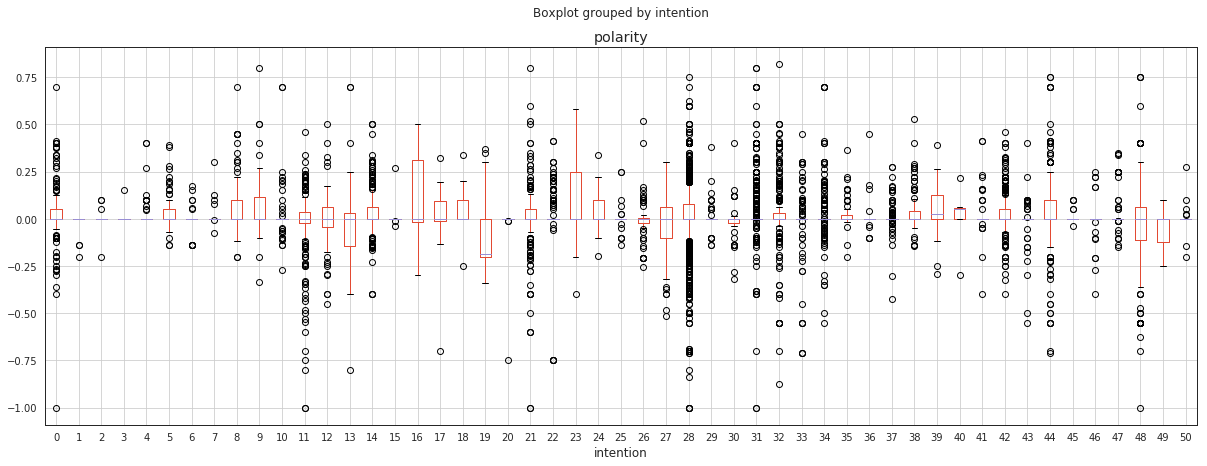

In [0]:
trainData.boxplot(column='polarity',by='intention', figsize = (20,7))

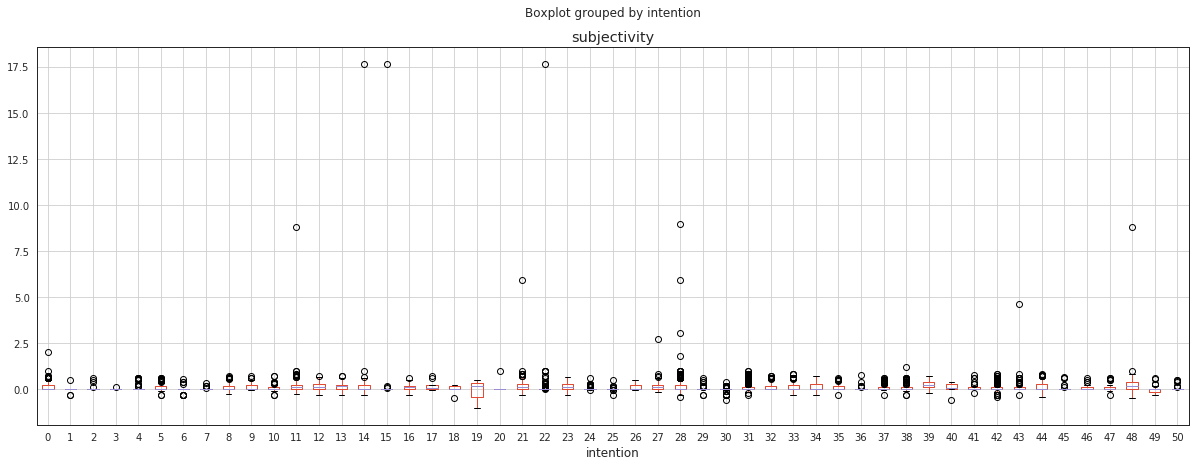

In [0]:
trainData.boxplot(column='subjectivity',by='intention', figsize = (20,7))

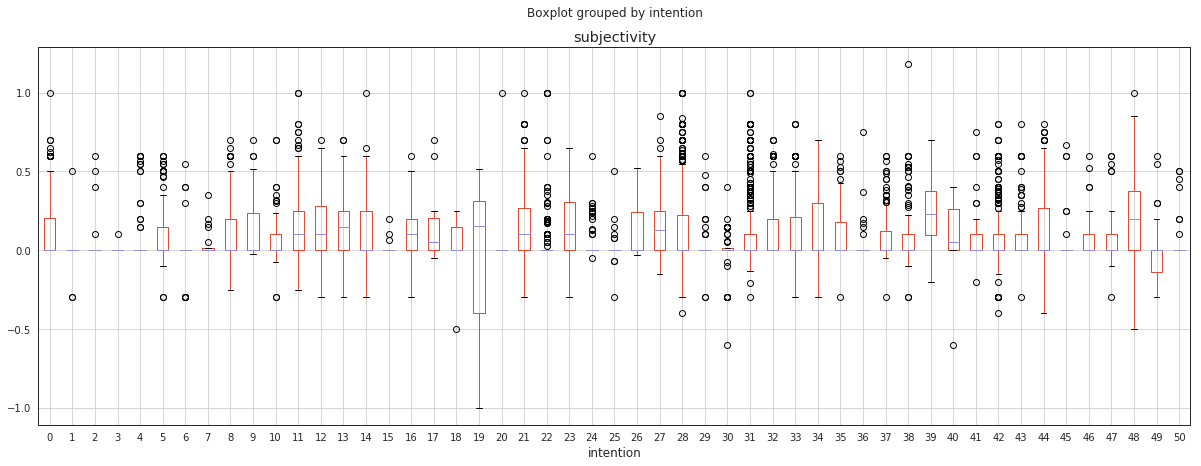

In [0]:
trainData[trainData.subjectivity<1.5].boxplot(column='subjectivity',by='intention', figsize = (20,7))

## Topic Modeling

In [0]:
# Importing Visualization Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import pyLDAvis
import pyLDAvis.gensim
from nltk.tokenize import word_tokenize, sent_tokenize
from functools import reduce
import gensim
import gensim.corpora as corpora
from gensim import matutils
from gensim.models import CoherenceModel
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from tqdm import tqdm_notebook

/cm/shared/apps/anaconda/3-5.3.1/lib/python3.7/site-packages/socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
/cm/shared/apps/anaconda/3-5.3.1/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/cm/shared/apps/anaconda/3-5.3.1/lib/python3.7/site-packages/bokeh/embed/util.py:25: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, OrderedDict


In [0]:
# Functions and variables
def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
def tokenizer(text):
    tokens = [word_tokenize(sent) for sent in sent_tokenize(text)]
    if text != '':
        tokens = list(reduce(lambda x,y: x+y, tokens))
    return tokens

def LDA_model(num_topics, passes=1):
    return gensim.models.ldamodel.LdaModel(corpus=tqdm_notebook(corpus, leave=False),
                                               id2word=id2word,
                                               num_topics=num_topics, 
                                               random_state=100,
                                               eval_every=10,
                                               chunksize=2000,
                                               passes=passes,
                                               per_word_topics=True
                                            )

def compute_coherence(model):
    coherence = CoherenceModel(model=model, 
                           texts=aux['tokens_bigram'].values,
                           dictionary=id2word, coherence='c_v')
    return coherence.get_coherence()

def explore_models(df, rg=range(5, 25)):
    id2word = corpora.Dictionary(df['tokens_bigram'])
    texts = df['tokens_bigram'].values
    corpus = [id2word.doc2bow(text) for text in texts]
    
    models = []
    coherences = []
    
    for num_topics in tqdm_notebook(rg, leave=False):
        lda_model = LDA_model(num_topics, passes=5)
        models.append(lda_model)
        coherence = compute_coherence(lda_model)
        coherences.append(coherence)
      

    fig = plt.figure(figsize=(15, 5))
    plt.title('Choosing the optimal number of topics')
    plt.xlabel('Number of topics')
    plt.ylabel('Coherence')
    plt.grid(True)
    plt.plot(rg, coherences)
    
    return coherences, models

vectorizer = TfidfVectorizer()
vz = vectorizer.fit_transform(list(trainData['question']))

tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(vz)

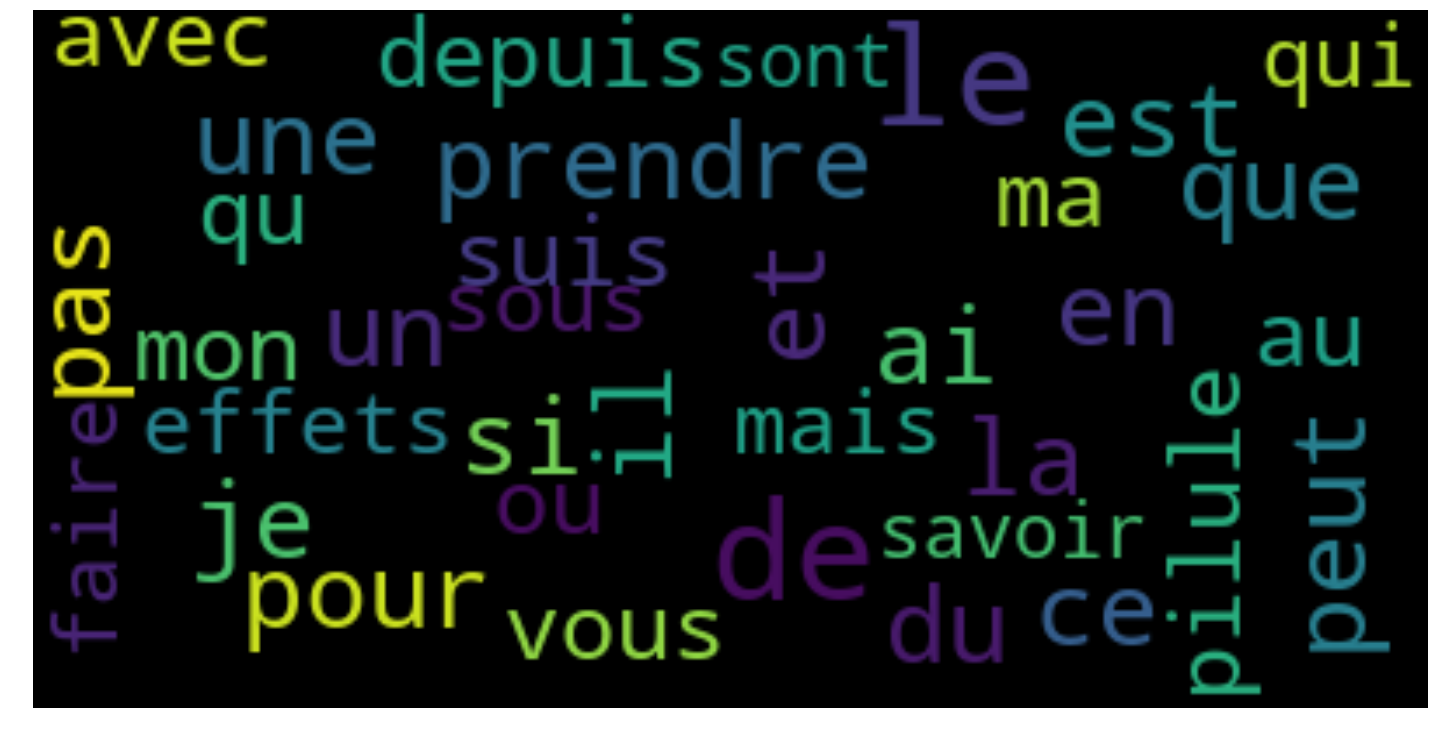

In [0]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(40))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8028 samples in 0.017s...
[t-SNE] Computed neighbors for 8028 samples in 5.720s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8028
[t-SNE] Computed conditional probabilities for sample 2000 / 8028
[t-SNE] Computed conditional probabilities for sample 3000 / 8028
[t-SNE] Computed conditional probabilities for sample 4000 / 8028
[t-SNE] Computed conditional probabilities for sample 5000 / 8028
[t-SNE] Computed conditional probabilities for sample 6000 / 8028
[t-SNE] Computed conditional probabilities for sample 7000 / 8028
[t-SNE] Computed conditional probabilities for sample 8000 / 8028
[t-SNE] Computed conditional probabilities for sample 8028 / 8028
[t-SNE] Mean sigma: 0.043006
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.363434
[t-SNE] Error after 500 iterations: 2.063248


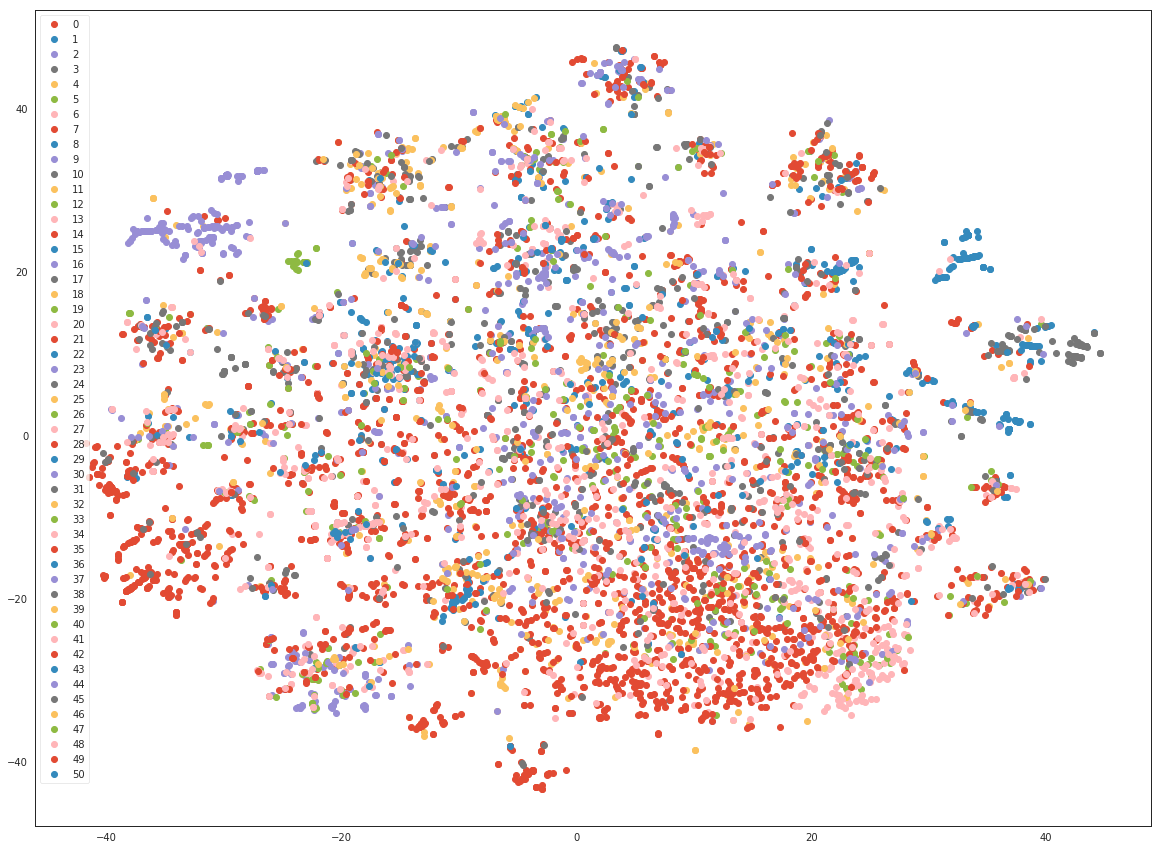

In [0]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)
tsne_tfidf_df = pd.DataFrame(tsne_tfidf)
tsne_tfidf_df.columns = ['x', 'y']
tsne_tfidf_df['category'] = trainData['intention']
groups = tsne_tfidf_df.groupby('category')
fig, ax = plt.subplots(figsize=(20, 15))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', label=name)
ax.legend()
plt.show()

In [0]:
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="tf-idf clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

palette = d3['Category10'][10]
color_map = bmo.CategoricalColorMapper(factors=tsne_tfidf_df['category'].map(str).unique(), palette=palette)

plot_tfidf.scatter(x='x', y='y', color={'field': 'category', 'transform': color_map}, 
                   legend='category', source=tsne_tfidf_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"category":"@category"}

show(plot_tfidf)

Loading BokehJS ...

/cm/shared/apps/anaconda/3-5.3.1/lib/python3.7/site-packages/bokeh/core/properties.py:1234: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(value, (collections.Container, collections.Sized, collections.Iterable))
/cm/shared/apps/anaconda/3-5.3.1/lib/python3.7/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['34' '14' '7' '37' '4' '11' '24' '40' '46' '30' '8' '38' '13' '21' '15'
 '27' '5' '33' '6' '25' '1' '50' '43' '45' '39' '29' '19' '12' '47' '20'
 '9' '10' '41' '49' '18' '17' '2' '36' '16' '35' '3'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


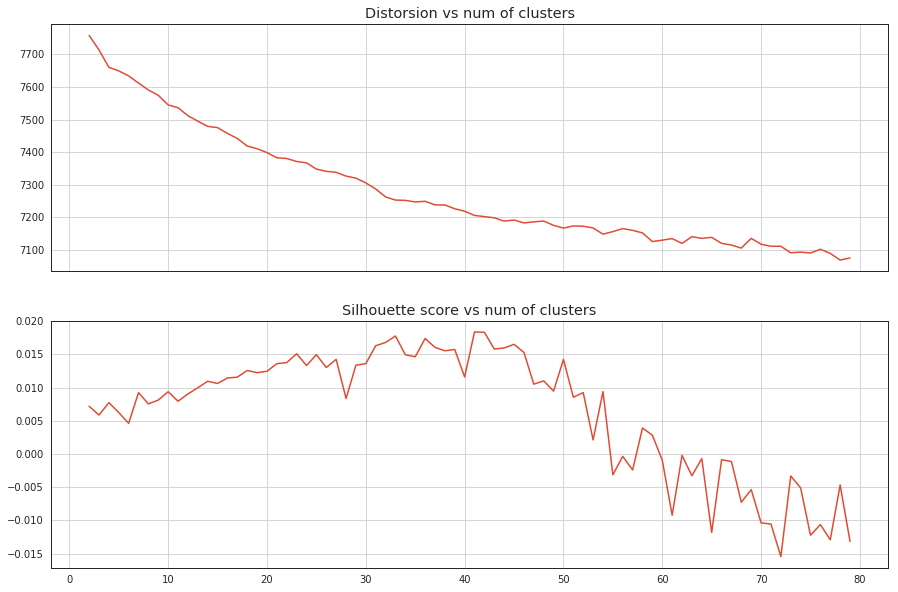

In [0]:
distorsions = []
sil_scores = []
k_max = 80
for k in tqdm_notebook(range(2, k_max)):
    kmeans_model = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=1, random_state=42,  
                         init_size=1000, verbose=False, max_iter=1000)
    kmeans_model.fit(vz)
    sil_score = silhouette_score(vz, kmeans_model.labels_)
    sil_scores.append(sil_score)
    distorsions.append(kmeans_model.inertia_)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

ax1.plot(range(2, k_max), distorsions)
ax1.set_title('Distorsion vs num of clusters')
ax1.grid(True)

ax2.plot(range(2, k_max), sil_scores)
ax2.set_title('Silhouette score vs num of clusters')
ax2.grid(True)

In [0]:
num_clusters = 51
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42,                       
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000, )
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
all_keywords = []
for i in range(num_clusters):
    topic_keywords = []
    for j in sorted_centroids[i, :10]:
        topic_keywords.append(terms[j])
    all_keywords.append(topic_keywords)

keywords_df = pd.DataFrame(index=['topic_{0}'.format(i) for i in range(num_clusters)], 
                           columns=['keyword_{0}'.format(i) for i in range(10)],
                           data=all_keywords)
#print(keywords_df)

In [0]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
tsne_kmeans = tsne_model.fit_transform(svd_tfidf)
kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['cluster'] = kmeans_df['cluster'].map(str)
kmeans_df['category'] = trainData['intention']

reset_output()
output_notebook()
plot_kmeans = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

palette = d3['Category20'][20] + d3['Category20b'][20] 
color_map = bmo.CategoricalColorMapper(factors=kmeans_df['cluster'].unique(), palette=palette)

plot_kmeans.scatter('x', 'y', source=kmeans_df, 
                    color={'field': 'cluster', 'transform': color_map}, 
                    legend='cluster')
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"cluster": "@cluster", "category": "@category"}

show(plot_kmeans)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8028 samples in 0.019s...
[t-SNE] Computed neighbors for 8028 samples in 5.481s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8028
[t-SNE] Computed conditional probabilities for sample 2000 / 8028
[t-SNE] Computed conditional probabilities for sample 3000 / 8028
[t-SNE] Computed conditional probabilities for sample 4000 / 8028
[t-SNE] Computed conditional probabilities for sample 5000 / 8028
[t-SNE] Computed conditional probabilities for sample 6000 / 8028
[t-SNE] Computed conditional probabilities for sample 7000 / 8028
[t-SNE] Computed conditional probabilities for sample 8000 / 8028
[t-SNE] Computed conditional probabilities for sample 8028 / 8028
[t-SNE] Mean sigma: 0.043006
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.363434
[t-SNE] Error after 500 iterations: 2.063248


Loading BokehJS ...

/cm/shared/apps/anaconda/3-5.3.1/lib/python3.7/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['29' '11' '23' '0' '37' '4' '39' '47' '19' '21' '50'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [0]:
aux = trainData.copy()
aux['tokens'] = aux['question'].map(lambda d: tokenizer(d))
bigram = gensim.models.Phrases(aux['tokens'], min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
#aux['tokens_bigram'] = aux['tokens'].progress_map(lambda tokens: bigram_mod[tokens])

id2word = corpora.Dictionary(aux['tokens_bigram'])
texts = aux['tokens_bigram'].values
corpus = [id2word.doc2bow(text) for text in texts]
coherences, models = explore_models(aux, rg=range(5, 85, 5))

"aux = trainData.copy()\naux['tokens'] = aux['question'].map(lambda d: tokenizer(d))\nbigram = gensim.models.Phrases(aux['tokens'], min_count=5, threshold=100)\nbigram_mod = gensim.models.phrases.Phraser(bigram)\n#aux['tokens_bigram'] = aux['tokens'].progress_map(lambda tokens: bigram_mod[tokens])\n\nid2word = corpora.Dictionary(aux['tokens_bigram'])\ntexts = aux['tokens_bigram'].values\ncorpus = [id2word.doc2bow(text) for text in texts]\ncoherences, models = explore_models(aux, rg=range(5, 85, 5))"

In [0]:
best_model = LDA_model(num_topics=50, passes=5)

def get_document_topic_matrix(corpus, num_topics=best_model.num_topics):
    matrix = []
    for row in tqdm_notebook(corpus):
        output = np.zeros(num_topics)
        doc_proba = best_model[row][0]
        for doc, proba in doc_proba:
            output[doc] = proba
        matrix.append(output)
    matrix = np.array(matrix)
    return matrix

matrix = get_document_topic_matrix(corpus)
doc_topic = best_model.get_document_topics(corpus)
lda_keys = []
for i, desc in enumerate(trainData['question_spacy']):
    lda_keys.append(np.argmax(matrix[i, :]))
    
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
tsne_lda = tsne_model.fit_transform(matrix)
lda_df = pd.DataFrame(tsne_lda, columns=['x', 'y'])
lda_df['topic'] = lda_keys
lda_df['topic'] = lda_df['topic'].map(str)
lda_df['question'] = trainData['question']
lda_df['category'] = trainData2['intention']

reset_output()
output_notebook()
plot_lda = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

palette = d3['Category20'][20] + d3['Category20b'][20] 
color_map = bmo.CategoricalColorMapper(factors=lda_df['topic'].unique(), palette=palette)
plot_lda.scatter('x', 'y', source=lda_df, 
                    color={'field': 'topic', 'transform': color_map}, 
                    legend='topic')
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips={"question": "@question", "topic": "@topic", "category": "@category"}

show(plot_lda)

'best_model = LDA_model(num_topics=50, passes=5)\n\ndef get_document_topic_matrix(corpus, num_topics=best_model.num_topics):\n    matrix = []\n    for row in tqdm_notebook(corpus):\n        output = np.zeros(num_topics)\n        doc_proba = best_model[row][0]\n        for doc, proba in doc_proba:\n            output[doc] = proba\n        matrix.append(output)\n    matrix = np.array(matrix)\n    return matrix\n\nmatrix = get_document_topic_matrix(corpus)\ndoc_topic = best_model.get_document_topics(corpus)\nlda_keys = []\nfor i, desc in enumerate(trainData[\'question_spacy\']):\n    lda_keys.append(np.argmax(matrix[i, :]))\n    \ntsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)\ntsne_lda = tsne_model.fit_transform(matrix)\nlda_df = pd.DataFrame(tsne_lda, columns=[\'x\', \'y\'])\nlda_df[\'topic\'] = lda_keys\nlda_df[\'topic\'] = lda_df[\'topic\'].map(str)\nlda_df[\'question\'] = trainData[\'question\']\nlda_df[\'category\'] = trainData2[\'intention\']\n\nreset_outp

# Text Preprocessing

## First method : Manual Preprocessing

In [0]:
# import french words dictionnary
dictionnary = pd.read_csv('../Datasets/NLP_POSOS/Dictionnary.txt', sep="\n", header=None, error_bad_lines= False)
dictionnary.columns = ['lines']

# Making words dictionnary
french_words = []
for i in range(len(dictionnary)):
    frwords = dictionnary.lines[i].split('|')
    for j in range(len(frwords)):
        french_words.append(frwords[j])

french_words = np.unique(french_words)[70:]

for i in range(len(french_words)):
    french_words[i] = french_words[i].lower()
    french_words[i] = unidecode.unidecode(french_words[i])
    
# Making verbs dictionnary
french_verbs = []
for i in range(len(dictionnary)):
    fverbs = dictionnary.lines[i].split('|')
    if fverbs[0] == '(Verbe)':
        for j in range(1,len(fverbs)):
            french_verbs.append(fverbs[j])

# Making stemmed verbs
french_verbs_stem = []
for i in range(len(french_verbs)):
    french_verbs_stem.append(stemmer.stem(french_verbs[i]))

# Stop words
stop_words = stopwords.words("french")

# Stop words that are not included
additional_stop_words = ['cela','contre','tous','toute','comme','vraiment','pour','est-il','sous', 'alors', 'ici', 'tres', 'quel', 'quelle', 'estce', 'jai', 'cest', 'les','si']
for i in range(len(additional_stop_words)):
    stop_words.append(additional_stop_words[i])
    
def tokenize1(text):
    text = text.lower()
    text = unidecode.unidecode(text)
    text = re.sub(r'[^a-z]',' ',text)
    word_list = [word for word in text.split() if len(word)>1]
    return word_list

def remove_noise1(words_list):
    words_list_clean = []
    for word in words_list:
        if not ((np.isin(word,stop_words)) or  ((word[-1] == 's') & ( np.isin(word[:-1],stop_words)))):
            if np.isin(word, french_words):
                words_list_clean.append(word)
            elif (word[-1] == 's') & (np.isin(word[:-1], french_words)) & (not np.isin(word[:-1],stop_words)):
                words_list_clean.append(word[:-1])
            else:
                index=-1
                a = stemmer.stem(word)
                for i in range(len(french_verbs_stem)):
                    if (a in french_verbs_stem[i]) & (len(french_verbs_stem[i])-len(a) < 2):
                        index = i
                        break
                if index != -1:
                    words_list_clean.append(unidecode.unidecode(french_verbs[index]))
    return words_list_clean

def normalise1(words_list):
    words_list_normalised = words_list
    return words_list_normalised

def text_preprocessing1(text):
    return normalise1(remove_noise1(tokenize1(text)))

trainData['question_manual_clean'] = trainData['question'].apply(lambda x: text_preprocessing1(x))
testData['question_manual_clean'] = testData['question'].apply(lambda x: text_preprocessing1(x))

## Second method : automatic Preprocessing with spacy

In [0]:
import spacy
from spacy.lang.fr.examples import sentences
nlp = spacy.load('fr_core_news_sm')

In [0]:
def text_preprocessing2(sentence):
    h = []
    d = nlp(sentence)
    for token in d:
        if (not token.is_stop) & (not token.is_punct) & (len(token.text) > 1) & (not np.isin(token.text,stop_words)) & (not np.isin(token.lemma_,stop_words)):
            h.append(token.lemma_)
    return ' '.join(h)

trainData['question_spacy'] = trainData['question'].apply(lambda x: text_preprocessing2(x))
testData['question_spacy'] = testData['question'].apply(lambda x: text_preprocessing2(x))

In [0]:
print(trainData.question_spacy.str.split(expand=True).stack().value_counts()[:50])
for i in range(0,(51)):
    print('-------'+str(i)+'-------')
    print(100*(trainData[trainData.intention==i].question_spacy.str.split(expand=True).stack().value_counts()/trainData[trainData.intention==i].question_spacy.str.split(expand=True).stack().value_counts().sum())[:15])
    

There are some words that are common between classes, so we judge them as not being so important : 
- quel : present in 68 classes
- prend : present in 67 classes
- jour : present in 54 classes
- avoir : present in 52 classes
- estce : present in 41 classes
- jai : present in 37 classes
- pris : present in 31 classes
- peut : present in 43 classes
- pilule : present in 30 classes
- vaccin : present in 30 classes
- plus : present in 28 classes
- cest : present in 28 classes
- faire : present in 27 classes

By looking at the unique words for each class, we were able to create dictionaries of important words by intention

## Adding frequency of medications as features

In [0]:
dictionnaryMed = pd.read_csv('../Datasets/NLP_POSOS/CIS.txt', sep="\n", header=None, error_bad_lines= False , encoding='latin-1')
dictionnaryMed.columns = ['lines']

MedD = set()
for i in range(len(dictionnaryMed)):
    Medwords = dictionnaryMed.lines[i].split('\t')
    if len(Medwords[1].split(' ')[0].lower())>2:
        if Medwords[1].split(' ')[0].lower()[-1] == ',':
            MedD.add(Medwords[1].split(' ')[0].lower()[:-1])
        else:
            MedD.add(Medwords[1].split(' ')[0].lower())
        
MedD = list(MedD)
MedD.remove('anti')
def Med(text):
    n=0
    text = text.lower()
    text = unidecode.unidecode(text)
    n = [word for word in text.split() if np.isin(word,MedD)]
    return len(n)

trainData['NMed'] = trainData.question
trainData['NMed'] = trainData.question_spacy.apply(lambda x : Med(x))
testData['NMed'] = testData.question
testData['NMed'] = testData.question_spacy.apply(lambda x : Med(x))


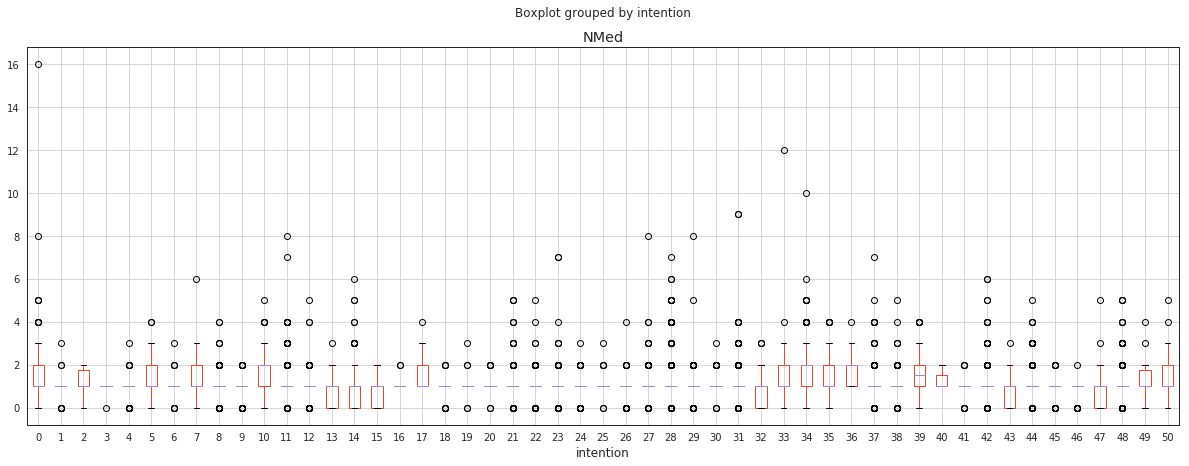

In [0]:
trainData.boxplot(column='NMed',by='intention', figsize = (20,7))

## Adding frequency of important words as features

In [0]:
# Creating important word lists for each intention
Cluster_temps = ['combien' ,'temps', 'heures', 'jours', 'jour','dure-t-il','pendant', 'semaine','semaines', 'longtemps']
Cluster_effet_second = ['effets', 'secondaires', 'secondaire', 'mauvaise', 'réaction', 'complications', 
                        'rebond', 'indésirables', 'malaises', 'pertes', 'secheresse', 'nausées', 'sueurs', 'sueur'
                       'maux', 'bouffées', 'boufée', 'mal']

Cluster_verbe_utiliser = ['servir', 'sert', 'aider', 'utiliser', 'marcher', 'prescrire']

Cluster_2 = ['bilan', 'glycemie','glycémie', 'biologique', 'serologie', 'suivi', 'sérologie'] ## Attention to Sang
Cluster_3 = [ 'rupture', 'stock', 'fabricant']
Cluster_4 = ['être', 'appartenir', 'famille', 'apparenter', 'classe', 'pharmacologique', 'categorie']
Cluster_5 = ['compose', 'composer', 'contenir', 'composition', 'difference']
Cluster_6 = ['disponible', 'a-t-il', 'exister', 'savoir', 'prendre']
Cluster_7 = ['garder', 'durer', 'duree', 'conservation', 'conserver', 'frigo', 'frais', 'reutilisable', 'utilisable', 'stabilite', 'temperature']
Cluster_8 = ['prescription', 'ordonnance', 'posologie', 'obtenir', 'legislation', 'delivrer']
Cluster_9 = ['prescrir', 'prescription', 'faire', 'changer', 'pharmacien', 'infermier', 'medecin']
Cluster_10 = ['notice', 'enchainer', 'passer']
Cluster_11 = ['help', 'suite', 'boutons', 'rouge', 'gaz', 'reaction', 'frissons', 'depuis', 'gauche', 'saignement', 'douleur', 'fatigue', 'mal']
Cluster_12 = ['depasser', 'oublier', 'oubli', 'exces', 'prendre', 'manquer', 'avaler', 'regurgiter', 'tromper', 'surdosage', 'que','faire']
Cluster_13 = ['risque', 'oublier', 'oubli', 'proteger', 'dangereux']
Cluster_14 = ['arreter', 'plaquette', 'est-ce-que', 'devoir', 'faire', 'pouvoir' ]
Cluster_15 = ['patch']
Cluster_16 = ['perime','conservation','ouverture','utilisable','depuis']
Cluster_17 = ['vaccin','inutilisable','perime','refrigerateur']
Cluster_18 = ['commercialiser', 'commercialisation', 'accessible', 'quel', 'disponible', 'existe', 'apparition', 'recent', 'anciennete', 'marche','nouveau']
Cluster_19 = ['comsomation', 'prendre', 'perimer', 'peremption', 'utiliser','consomer','date','validite','expirer']
Cluster_20 = ['version', 'marque', 'nom', 'commercial', 'specialité'] # Generique supprimé par Sofiane
Cluster_21 = ['Arret', 'sevrage', 'effet', 'reaction', 'reaction', 'stopper', 'arreter']
Cluster_22 = ['question', 'cest' , 'quoi', 'que', 'connaitre', 'info', 'renseignement', 'renseigner' ]
Cluster_23 = ['premiere', 'combien', 'temps', 'marche', 'efficace', 'effets', 'attendre', 'action', 'bout']
Cluster_24 = ['disponibilite','procurer', 'trouver', 'acheter', 'retire', 'retour']
Cluster_25 = ['dosage','combien','unidose','doser','injection' ]
Cluster_26 = ['efficace', 'effet', 'efficacite', 'protege', 'agir']
Cluster_27 = Cluster_effet_second + Cluster_temps
Cluster_28 = ['trouver', 'France', 'france', 'exister', 'vente', 'commercialisé', 'disponible', 'où', 'ou', 'marché']
Cluster_30 = ['couper', 'diluer', 'mélanger', 'lait', 'sirop', 'réduire', 'doses', 'dose', 'sécable','sécable',
             'secable', 'réduire']
Cluster_31 = ['indications', 'indication', 'role', 'rôle', 'roles', 'rôles'] + Cluster_verbe_utiliser

Cluster_33 = ['Alcool', 'alcool', 'fumer', 'boire', 'boit', 'cigarette', 'cigarettes','café', 'cafe', 'drogue','soleil', 'piscine', 'jus', 'fruit']
Cluster_34 = ['mélanger', 'associer', 'en même temps']
Cluster_35 = ['au lieu de', 'moyen', 'moyens']
Cluster_38 = ['moment' , 'soir'   , 'matin'  ,  'heure'  , 'midi', 'réveil', 'quand', 'moment'] + ['prendre']

Cluster_40 = ['origine', 'base','vient', 'où'  , 'demande', 'demander', 'souhaite', 'souhaiter']
Cluster_41 = ['éliminer' ,'ressort' , 'demi-vie' ,'métabolisation' ,'metaboliser','hépatique' ,'absorption' ,'élimination' ,'éliminé', 'elimination']
Cluster_42 = ['mg' ,'dose' ,'combien']

Cluster_44 = ['enfants' ,'bébé' ,'enceinte' ,'grossesse', 'nourisson', 'bebe', 'enfant']
Cluster_45 = ['version','générique' ,'DCI']
Cluster_46 = ['prix' ,'€' ,'couter' ,'coûte','cout','coûter' ,'payer' ,'tarif', 'coute' ]
Cluster_47 = ['Remboursée' ,'remboursement' ,'sécurité','securite', 'sociale' ,'déremboursé' ,
              'remboursable' , 'charge', 'payant', 'rembourser', 'derembourser', 'rembourse']
Cluster_48 = ['dangereux' ,'risques','risque', 'risquer' ]
Cluster_49 = ['dissoudre' ,'découpables' ,'sécable' ,'casser' ,'couper','coupé' ,'divise']
Cluster_50 = ['substituable' ,'non-substituable' ,'substitue', 'substitué']

important_words_list = Cluster_temps+Cluster_effet_second+Cluster_verbe_utiliser+Cluster_2+Cluster_3+Cluster_4+Cluster_5+Cluster_6+Cluster_7+Cluster_8+Cluster_9+Cluster_10+Cluster_11+Cluster_12+Cluster_13+Cluster_14+Cluster_15+Cluster_16+Cluster_17+Cluster_18+Cluster_19+Cluster_20+Cluster_21+Cluster_22+Cluster_23+Cluster_24+Cluster_25+Cluster_26+Cluster_28+Cluster_30+Cluster_31+Cluster_33+Cluster_34+Cluster_35+Cluster_38+Cluster_40+Cluster_41+Cluster_42+Cluster_44+Cluster_45+Cluster_46+Cluster_47+Cluster_48+Cluster_49+Cluster_50
important_words_list = list(set([unidecode.unidecode(word) for word in important_words_list]))

def function_count(phrase):
    important_words_count = [0]*len(important_words_list)
    
    for i in range(len(important_words_list)):
        important_words_count[i] = len([word for word in phrase.split() if np.isin(word,important_words_list[i])])
        important_words_count[i] = important_words_count[i]/len(phrase.split())
    return important_words_count

important_words_count_list_train = list()

for i in range(len(trainData)):
    important_words_count_list_train.append(function_count(trainData.question_spacy.iloc[i]))
                                     
important_words_count_list_test = list()                                                                         
for i in range(len(trainData)):
    important_words_count_list_test.append(function_count(testData.question_spacy[i]))
    
trainData = pd.concat([trainData, pd.DataFrame(important_words_count_list, columns=important_words_list)], axis=1)
testData = pd.concat([testData, pd.DataFrame(important_words_count_list, columns=important_words_list)], axis=1)


KeyError: 2035

# Predictions

## Setting up the environment for prediction

In [0]:
# Accuracy function
def score_function(y_true, y_pred):
    score = 0
    length1 = y_true.shape[0]
    for i in range(length1):
        if y_pred[i] == y_true[i]:
            score += 1
    return float(score)/float(length1)

In [0]:
# Split train and validation data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(trainData.drop(columns='intention'), trainData.intention, 
                                                  stratify=trainData.intention,
                                                  random_state=42, 
                                                  test_size=0.15, shuffle=True)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((6823, 10), (1205, 10), (6823,), (1205,))

In [0]:
# add features
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

## Count Vectorizer Model

In [0]:
# Counter Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vect = CountVectorizer().fit(x_train.question)
vect_clean1 = CountVectorizer().fit(x_train.question_manual_clean)
vect_clean2 = CountVectorizer().fit(x_train.question_spacy)

X_original_vectorized = vect.transform(x_train.question)
X_train_vectorized1 = vect_clean1.transform(x_train.question_manual_clean)
X_train_vectorized2 = vect_clean2.transform(x_train.question_spacy)

model_original = MultinomialNB(alpha=0.1)
model_1 = MultinomialNB(alpha=0.1)
model_2 = MultinomialNB(alpha=0.1)

model_original.fit(X_original_vectorized, y_train)
model_1.fit(X_train_vectorized1, y_train)
model_2.fit(X_train_vectorized2, y_train)


feature_names_original = np.array(vect.get_feature_names())
feature_names_1 = np.array(vect_clean1.get_feature_names())
feature_names_2 = np.array(vect_clean2.get_feature_names())

sorted_coef_index_original = model_original.coef_[0].argsort()
sorted_coef_index_1 = model_1.coef_[0].argsort()
sorted_coef_index_2 = model_2.coef_[0].argsort()

print('orginal')
print('Vocabulary len:', len(feature_names_original))
print('Shortest word:', min(vect.vocabulary_, key=len))
print('Longest word:', max(vect.vocabulary_, key=len))
print('Smallest Coefs: {}'.format(feature_names_original[sorted_coef_index_original[:8]]))
print('Largest Coefs: {}'.format(feature_names_original[sorted_coef_index_original[:-11:-1]]))
print('Accuracy: %.2f%%' % (score_function(model_original.predict(vect.transform(x_valid.question)), y_valid.values) * 100))

print('\nmethod 1:')
print('Vocabulary len:', len(feature_names_1))
print('Shortest word:', min(vect_clean1.vocabulary_, key=len))
print('Longest word:', max(vect_clean1.vocabulary_, key=len))
print('Smallest Coefs: {}'.format(feature_names_1[sorted_coef_index_1[:8]]))
print('Largest Coefs: {}'.format(feature_names_1[sorted_coef_index_1[:-11:-1]]))
print('Accuracy: %.2f%%' % (score_function(model_1.predict(vect_clean1.transform(x_valid.question)), y_valid.values) * 100))

print('\nmethod 2:')
print('Vocabulary len:', len(feature_names_1))
print('Shortest word:', min(vect_clean2.vocabulary_, key=len))
print('Longest word:', max(vect_clean2.vocabulary_, key=len))
print('Smallest Coefs: {}'.format(feature_names_2[sorted_coef_index_2[:8]]))
print('Largest Coefs: {}'.format(feature_names_2[sorted_coef_index_2[:-11:-1]]))
print('Accuracy: %.2f%%' % (score_function(model_2.predict(vect_clean2.transform(x_valid.question)), y_valid.values) * 100))

orginal
Vocabulary len: 9051
Shortest word: de
Longest word: photosensibilisation
Smallest Coefs: ['00' 'ouverture' 'ouverte' 'ouvert' 'outre' 'ous' 'ouf' 'oubliés']
Largest Coefs: ['de' 'je' 'le' 'la' 'et' 'que' 'il' 'est' 'un' 'ai']
Accuracy: 58.42%

method 1:
Vocabulary len: 3383
Shortest word: ca
Longest word: malencontreusement
Smallest Coefs: ['abandonne' 'opercule' 'operer' 'opter' 'optique' 'orange' 'oraux' 'ordo']
Largest Coefs: ['prendre' 'remplacer' 'plus' 'autre' 'quoi' 'alternative' 'medicament'
 'traitement' 'ca' 'place']
Accuracy: 47.80%

method 2:
Vocabulary len: 3383
Shortest word: qu
Longest word: photosensibilisation
Smallest Coefs: ['00' 'olmetec' 'olivier' 'oligostim' 'oligosol' 'olea' 'olanzapine' 'ok']
Largest Coefs: ['prendre' 'remplacer' 'alternative' 'traitement' 'savoir' 'faire' 'place'
 'mg' 'médicament' 'pilule']
Accuracy: 36.76%


## TF_IDF Vectorizer Model

In [0]:
# TfidfVectorize model

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=3).fit(x_train.question)
vect_clean1 = TfidfVectorizer(min_df=3, ngram_range=(1, 3)).fit(x_train.question_manual_clean)
vect_clean2 = TfidfVectorizer(min_df=3, ngram_range=(1, 3)).fit(x_train.question_spacy)

X_original_vectorized = vect.transform(x_train.question)
X_train_vectorized1 = vect_clean1.transform(x_train.question_manual_clean)
X_train_vectorized2 = vect_clean2.transform(x_train.question_spacy)

X_train_vectorized2 = add_feature(X_train_vectorized2, x_train.question_spacy.str.len())
X_train_vectorized2 = add_feature(X_train_vectorized2, x_train.question_spacy.str.replace(r'\D+', '').str.len())
X_train_vectorized2 = add_feature(X_train_vectorized2, x_train.question_spacy.str.replace(r'\w+', '').str.len())

X_test_vectorized = vect_clean2.transform(x_valid.question)
X_test_vectorized = add_feature(X_test_vectorized, x_valid.question.str.len())
X_test_vectorized = add_feature(X_test_vectorized, x_valid.question.str.replace(r'\D+', '').str.len())
X_test_vectorized = add_feature(X_test_vectorized, x_valid.question.str.replace(r'\w+', '').str.len())

model_original = MultinomialNB(alpha=0.1)
model_1 = MultinomialNB(alpha=0.1)
model_2 = MultinomialNB(alpha=0.1)

model_original.fit(X_original_vectorized, y_train)
model_1.fit(X_train_vectorized1, y_train)
model_2.fit(X_train_vectorized2, y_train)

feature_names_original = np.array(vect.get_feature_names())
feature_names_1 = np.array(vect_clean1.get_feature_names())
feature_names_2 = np.array(vect_clean2.get_feature_names())

sorted_coef_index_original = model_original.coef_[0].argsort()
sorted_coef_index_1 = model_1.coef_[0].argsort()
sorted_coef_index_2 = model_2.coef_[0].argsort()

print('orginal')
print('Vocabulary len:', len(feature_names_original))
print('Shortest word:', min(vect.vocabulary_, key=len))
print('Longest word:', max(vect.vocabulary_, key=len))
print('Smallest Coefs: {}'.format(feature_names_original[sorted_coef_index_original[:8]]))
print('Largest Coefs: {}'.format(feature_names_original[sorted_coef_index_original[:-11:-1]]))
print('Accuracy: %.2f%%' % (score_function(model_original.predict(vect.transform(x_valid.question)), y_valid.values) * 100))

print('\nmethod 1:')
print('Vocabulary len:', len(feature_names_1))
print('Shortest word:', min(vect_clean1.vocabulary_, key=len))
print('Longest word:', max(vect_clean1.vocabulary_, key=len))
print('Smallest Coefs: {}'.format(feature_names_1[sorted_coef_index_1[:8]]))
print('Largest Coefs: {}'.format(feature_names_1[sorted_coef_index_1[:-11:-1]]))
print('Accuracy: %.2f%%' % (score_function(model_1.predict(vect_clean1.transform(x_valid.question)), y_valid.values) * 100))

print('\nmethod 2:')
print('Vocabulary len:', len(feature_names_1))
print('Shortest word:', min(vect_clean2.vocabulary_, key=len))
print('Longest word:', max(vect_clean2.vocabulary_, key=len))
#print('Smallest Coefs: {}'.format(feature_names_2[sorted_coef_index_2[:8]]))
#print('Largest Coefs: {}'.format(feature_names_2[sorted_coef_index_2[:-11:-1]]))
print('Accuracy: %.2f%%' % (score_function(model_2.predict(X_test_vectorized), y_valid.values) * 100))

orginal
Vocabulary len: 2991
Shortest word: de
Longest word: photosensibilisant
Smallest Coefs: ['00' 'ok' 'oligosol' 'oméprazole' 'onagre' 'ongles' 'opium' 'optilova']
Largest Coefs: ['remplacer' 'par' 'alternative' 'le' 'de' 'je' 'la' 'quoi' 'il' 'est']
Accuracy: 54.27%

method 1:
Vocabulary len: 3804
Shortest word: ca
Longest word: transpiration excessive jaborandi
Smallest Coefs: ['abondant' 'plaquette pilule' 'plaquette premier' 'plaquette prendre'
 'plaquette pris' 'plaquette prise' 'plaquette puis' 'plaquette quand']
Largest Coefs: ['remplacer' 'alternative' 'quoi' 'equivalent' 'quoi remplacer' 'place'
 'autre' 'plus' 'rupture' 'prendre']
Accuracy: 50.04%

method 2:
Vocabulary len: 3804
Shortest word: qu
Longest word: seconadir spironolactone aldacton
Accuracy: 35.19%


## Deep Learning Model

In [0]:
max_features = 6000
tokenizer = tokenizer(num_words=max_features)
tokenizer.fit_on_texts(trainData['question_spacy'])
list_tokenized_train = tokenizer.texts_to_sequences(trainData['question_spacy'])
list_tokenized_test = tokenizer.texts_to_sequences(testData['question_spacy'])

maxlen = 45
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

y = trainData['intention']

y_binary = to_categorical(y)
embed_size = 128
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(LSTM(60, return_sequences = True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(51, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(51, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 20
model.fit(X_t,y_binary, batch_size=batch_size, epochs=epochs, validation_split=0.15)

## Stacking - First Try

In [0]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import unidecode


In [0]:
# Accuracy function
def score_function(y_true, y_pred):
    score = 0
    length1 = y_true.shape[0]
    for i in range(length1):
        if y_pred.iloc[i] == y_true[i]:
            score += 1
    return float(score)/float(length1)

In [0]:
# Accuracy function
def score_function2(y_true, y_pred):
    score = 0
    length1 = y_true.shape[0]
    for i in range(length1):
        if y_pred[i] == y_true[i]:
            score += 1
    return float(score)/float(length1)

In [0]:
xtrain = trainData.question_spacy
y = trainData.intention

In [0]:
# Always start with these features. They work (almost) everytime!
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,)

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(xtrain))
xtrain_tfv_train =  tfv.transform(xtrain)
#xtrain_tfv_valid =  tfv.transform(xvalid)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid, ztrain, zvalid = train_test_split(trainData.question_spacy, y, xtrain_tfv_train,
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [0]:
clf = RandomForestClassifier(n_estimators=250, random_state=0)
clf.fit(ztrain, ytrain)
predictions_tfv = clf.predict(zvalid)
print('The score on the validation set using the tfv is  {}' .format(score_function(predictions_tfv, yvalid)))

The score on the validation set using the tfv is  0.6070983810709838


In [0]:
y_28 = []
for i in range(0, len(trainData.intention)):
    if trainData.intention[i] ==28:
        y_28.append(1)
    else:
        y_28.append(0)
y_31 = []
for i in range(0, len(trainData.intention)):
    if trainData.intention[i] == 31:
        y_31.append(1)
    else:
        y_31.append(0)
y_44 = []
for i in range(0, len(trainData.intention)):
    if trainData.intention[i] == 44:
        y_44.append(1)
    else:
        y_44.append(0)
y_22 = []
for i in range(0, len(trainData.intention)):
    if trainData.intention[i] == 22:
        y_22.append(1)
    else:
        y_22.append(0)
y_48 = []
for i in range(0, len(trainData.intention)):
    if trainData.intention[i] == 48:
        y_48.append(1)
    else:
        y_48.append(0)
y_34 = []
for i in range(0, len(trainData.intention)):
    if trainData.intention[i] == 34:
        y_34.append(1)
    else:
        y_34.append(0)
y_32 = []
for i in range(0, len(trainData.intention)):
    if trainData.intention[i] == 32:
        y_32.append(1)
    else:
        y_32.append(0)
y = []
for i in range(0, len(trainData.intention)):
    if trainData.intention[i] != 28 & trainData.intention[i] != 31 & trainData.intention[i] != 44 & trainData.intention[i] != 22& trainData.intention[i] != 48 & trainData.intention[i] != 34 & trainData.intention[i] != 32:
        y.append(trainData.intention[i])
    else:
        y.append(-1)
y2 = []
for i in range(0, len(trainData.intention)):
    if trainData.intention[i] == 28 or trainData.intention[i] == 31 or trainData.intention[i] == 44 or trainData.intention[i] == 22 or trainData.intention[i] == 48 or trainData.intention[i] == 34 or trainData.intention[i] == 32:
        y2.append(trainData.intention[i])
    else:
        y2.append(28)

In [0]:
y_28 = pd.DataFrame(y_28)
y_31 = pd.DataFrame(y_31)
y_44 = pd.DataFrame(y_44)
y_22 = pd.DataFrame(y_22)
y_48 = pd.DataFrame(y_48)
y_34 = pd.DataFrame(y_34)
y_32 = pd.DataFrame(y_32)
y = pd.DataFrame(y)
y2 = pd.DataFrame(y2)

In [0]:
# 28 31 44 22 48 34 32 14 42 23 0

# 28 model
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Count Vectorizer
vect_clean1 = CountVectorizer().fit(trainData.drop('intention', axis=1).question_spacy)
X_train_vectorized1 = vect_clean1.transform(trainData.drop('intention', axis=1).question_spacy)
X_train_vectorized2 = vect_clean1.transform(testData.question_spacy)

# Random Forest model 
rf28 = RandomForestClassifier(n_estimators=60, max_depth=300,random_state=40)
rf28.fit(X_train_vectorized1, y_28)

rf31 = RandomForestClassifier(n_estimators=60, max_depth=300,random_state=40)
rf31.fit(X_train_vectorized1, y_31)

rf44 = RandomForestClassifier(n_estimators=60, max_depth=300,random_state=40)
rf44.fit(X_train_vectorized1, y_44)

rf22 = RandomForestClassifier(n_estimators=60, max_depth=300,random_state=40)
rf22.fit(X_train_vectorized1, y_22)

rf48 = RandomForestClassifier(n_estimators=60, max_depth=300,random_state=40)
rf48.fit(X_train_vectorized1, y_48)

rf34 = RandomForestClassifier(n_estimators=60, max_depth=300,random_state=40)
rf34.fit(X_train_vectorized1, y_34)

rf32 = RandomForestClassifier(n_estimators=60, max_depth=300,random_state=40)
rf32.fit(X_train_vectorized1, y_32)

Features = []
Features2 = []
a28 = rf28.predict_proba(X_train_vectorized1)
a31 = rf31.predict_proba(X_train_vectorized1)
a44 = rf44.predict_proba(X_train_vectorized1)
a22 = rf22.predict_proba(X_train_vectorized1)
a48 = rf48.predict_proba(X_train_vectorized1)
a34 = rf34.predict_proba(X_train_vectorized1)
a32 = rf32.predict_proba(X_train_vectorized1)
aa28 = rf28.predict_proba(X_train_vectorized2)
aa31 = rf31.predict_proba(X_train_vectorized2)
aa44 = rf44.predict_proba(X_train_vectorized2)
aa22 = rf22.predict_proba(X_train_vectorized2)
aa48 = rf48.predict_proba(X_train_vectorized2)
aa34 = rf34.predict_proba(X_train_vectorized2)
aa32 = rf32.predict_proba(X_train_vectorized2)
for i in range(0,len(y)):
    Features.append([a28[i][0],
                 a31[i][0],
                 a44[i][0],
                 a22[i][0],
                 a48[i][0],
                 a34[i][0],
                 a32[i][0]])
for i in range(0,len(testData)):
    Features2.append([aa28[i][0],
                 aa31[i][0],
                 aa44[i][0],
                 aa22[i][0],
                 aa48[i][0],
                 aa34[i][0],
                 aa32[i][0]])

In [0]:

y = []
for i in range(0, len(trainData.intention)):
    if trainData.intention[i] == 28 or trainData.intention[i] == 31 or trainData.intention[i] == 44 or trainData.intention[i] == 22 or trainData.intention[i] == 48 or trainData.intention[i] == 34 or trainData.intention[i] == 32:
        y.append(trainData.intention[i])
    else:
        y.append(-1)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
y_train4, y_valid4,y_train3, y_valid3,x_train2, x_valid2,x_train, x_valid,y_train, y_valid,ze,y_pred,y_train2, y_valid2=train_test_split(trainData.intention,trainData.intention,trainData.drop('intention', axis=1),Features,y,y,y2,
                                                  stratify=trainData.intention,
                                                  random_state=42, 
                                                  test_size=0.15, shuffle=True)
for i in range(0,len(y_valid)):
    y_pred.iloc[i] = -1

rf = RandomForestClassifier(n_estimators=60, max_depth=300,random_state=40)
rf.fit(x_train, y_train)
print(score_function2(rf.predict(x_valid), y_valid.values))

0.9908713692946058


In [0]:
test = rf.predict(x_valid)
testtest = rf.predict(Features2)
y_index = []
for i in range(0,len(y_valid)):
    if test[i] != -1:
        y_pred[0][y_valid.index[i]] = test[i]
        y_index.append(y_valid.index[i])
x_valid2 = x_valid2.drop(y_index)
y_valid3 = y_valid3.drop(y_index)


In [0]:
atest_pred = testData.question
for i in range(0,len(testData)):
    atest_pred[i] = -1

In [0]:
y_index2 = []
for i in range(0,len(testData)):
    if testtest[i] != -1:
        atest_pred[testData.index[i]] = testtest[i]
        y_index2.append(testData.index[i])
testData = testData.drop(y_index2)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Always start with these features. They work (almost) everytime!
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,)

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(x_train2.question_spacy))
xtrain_tfv_train =  tfv.transform(x_train2.question_spacy)
xtrain_tfv_valid =  tfv.transform(x_valid2.question_spacy)
xtest_tfv_valid =  tfv.transform(testData.question_spacy)

In [0]:
test2 = clf.predict(xtrain_tfv_valid)
testtest2 = clf.predict(xtest_tfv_valid)

In [0]:
y_index = []
for i in range(0,len(y_valid3)):
    y_pred[0][y_valid3.index[i]] = test2[i]
    y_index.append(y_valid3.index[i])
    
for i in range(0,len(testData)):
    atest_pred[testData.index[i]] = testtest2[i]


In [0]:
print(score_function2(y_pred[0].values, y_valid4.values))

0.7529118136439268
